<link rel='stylesheet' href='../assets/css/main.css'/>

[<< back to main index](../README.md)

# Linear Regression in using Tensorflow 

### Overview
Instructor to demo this on screen.
 
### Builds on
None

### Run time
approx. 20-30 minutes

### Notes

We can do linear regression with ordinary. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import tensorflow as tf


/Users/tfox/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Example : Tips
Here is our tip data.  This shows 10 observations of bill with tip amounts.

| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 

## Step 1: Let's create a Pandas dataframe with the data


In [2]:
tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })

tip_data


,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


## Step 2: Let's do a quick plot of the data

Let us use matplotlib to do a quick scatter plot of the data.

**=>TODO: plot the bill (X-axis), versus the tip (Y-axis)**

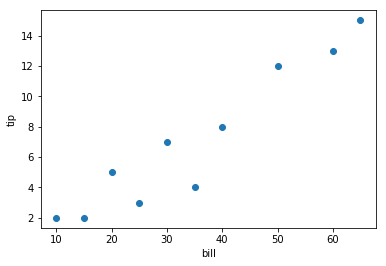

In [3]:
plt.scatter(tip_data.bill, tip_data.tip)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()

In [4]:
x = tip_data['bill'].values
y = tip_data['tip'].values
print('bill = ' + str(x))
print('tip = ' + str(y))

bill = [50. 30. 60. 40. 65. 20. 10. 15. 25. 35.]
tip = [12.  7. 13.  8. 15.  5.  2.  2.  3.  4.]



## Step 4: Define Feature Columns

We need to define our feature columns

In [5]:
feature_columns = [ 
    tf.feature_column.numeric_column(key="bill"),
]

## Step 5: Define Optimize and Model

In [6]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0002)
linear_regressor = tf.estimator.LinearRegressor(feature_columns=feature_columns, optimizer=my_optimizer)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/7x/znb4fcbj4cz29mcptf7dnpjr0000gn/T/tmpxjpn782m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a30a9a160>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [7]:
def input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    features = {key : np.array(value) for key,value in dict(features).items()}
    
    ds = tf.data.Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [8]:
training_input_fn = tf.estimator.inputs.pandas_input_fn(x = tip_data[['bill']],
                                                        y=tip_data['tip'],
                                                        batch_size=1,
                                                        shuffle= True,
                                                        num_epochs = 1)
linear_regressor.train(training_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/7x/znb4fcbj4cz29mcptf7dnpjr0000gn/T/tmpxjpn782m/model.ckpt.
INFO:tensorflow:loss = 169.0, step = 1
INFO:tensorflow:Saving checkpoints for 10 into /var/folders/7x/znb4fcbj4cz29mcptf7dnpjr0000gn/T/tmpxjpn782m/model.ckpt.
INFO:tensorflow:Loss for final step: 3.128963.


## Step: Create the prediction function

In [ ]:
prediction_input_fn = lambda: input_fn(tip_data[['bill']], tip_data['tip'], num_epochs=1, shuffle=False)

In [ ]:
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

predictions = np.array( [item['predictions'][0] for item in predictions])

In [ ]:
from sklearn.metrics import *
import math

mse = mean_squared_error(predictions, tip_data['tip'])
rmse = math.sqrt(mse)

print("MSE: %0.3f" % mse)

In [ ]:
weight = linear_regressor.get_variable_value('linear/linear_model/bill/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
print(weight)
print(bias)

## Step 7: Plot the fit line (abline)

**=>TODO: Do a scatterplot of bill versus tip **

In [ ]:
# Create a list of values in the best fit line
# TODO: Fill in gradient and intercept in formula
abline_values = [??? * i + ??? for i in tip_data.bill]

# Plot the best fit line over the actual values
plt.scatter(tip_data.bill, tip_data.tip)
plt.plot(tip_data.bill, abline_values, 'b')
plt.ylabel('tip')
plt.xlabel('bill')
plt.title("Fit Line")
plt.show()

In [ ]:
# Make a prediction using the slope and the intercept
y_pred = tip_data.bill.values.reshape(10,1)
y_test = tip_data.tip.values.reshape(10,1)




## Step 8: Print out the Outputs

Here is a sample output:

## Step 9: Plot the residuals

Residuals are the error, or difference between the model predicted and model actual.  We'd like these to be as small as possible, with residuals roughly balanced.   We don't want a model that consistently predicts values too high or too low.

**=>TODO: do a plot of the bill (x-value) versus residuals (y-value) **

In [ ]:
resid = (??? * tip_data.bill + ???) - tip_data.tip

In [ ]:
plt.scatter(tip_data.bill, resid)
plt.axhline(y=0, color='r', linestyle='-')  # horizon
plt.ylabel('Residuals')
plt.xlabel('bill')
plt.title("Residuals")
plt.show()




## Step 10 : Identify Coefficients

### Intercept and Slope
We can see them from output

Coefficients:
            Estimate 
(Intercept) -0.8217112049846651
bill        0.226334605857

- **Slope** (of line) : ** 0.226334605857**
- **Intercept** (where line meets Y-axis) : **-0.8217112049846651**  (below zero line)

We can also get these programatically.  
If `tip = a * amount + b`

In [ ]:

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(weight))
print("Intercept: %s" % str(bias))

a = weight
b = bias


**==>  Question : Does bill amount influence tip amount? (are they strongly linked?) **




### TODO: Calcluate Tip for 100 bill.

In [ ]:
tip_for_100 = ??? * 100 + ??? 
print(tip_for_100)


## Step 12: Add a estimated_tip column to pandas dataframe

**=>TODO: create a new pandas column called est_tip **

In [ ]:
tip_data['est_tip'] =  ???
tip_data

## Step 13: Perform a prediction


Let's try to run a prediction on some data: $45.00, $55.00, and $65.00 


**=>TODO: use model to transform dataframe with feature vectors to make predictions **

In [ ]:
test_data_pd = pd.DataFrame({'bill' : [45., 55., 65.,]
             })

test_data_pd['predicted_tip'] = result.predict(test_data_pd)



test_data_pd